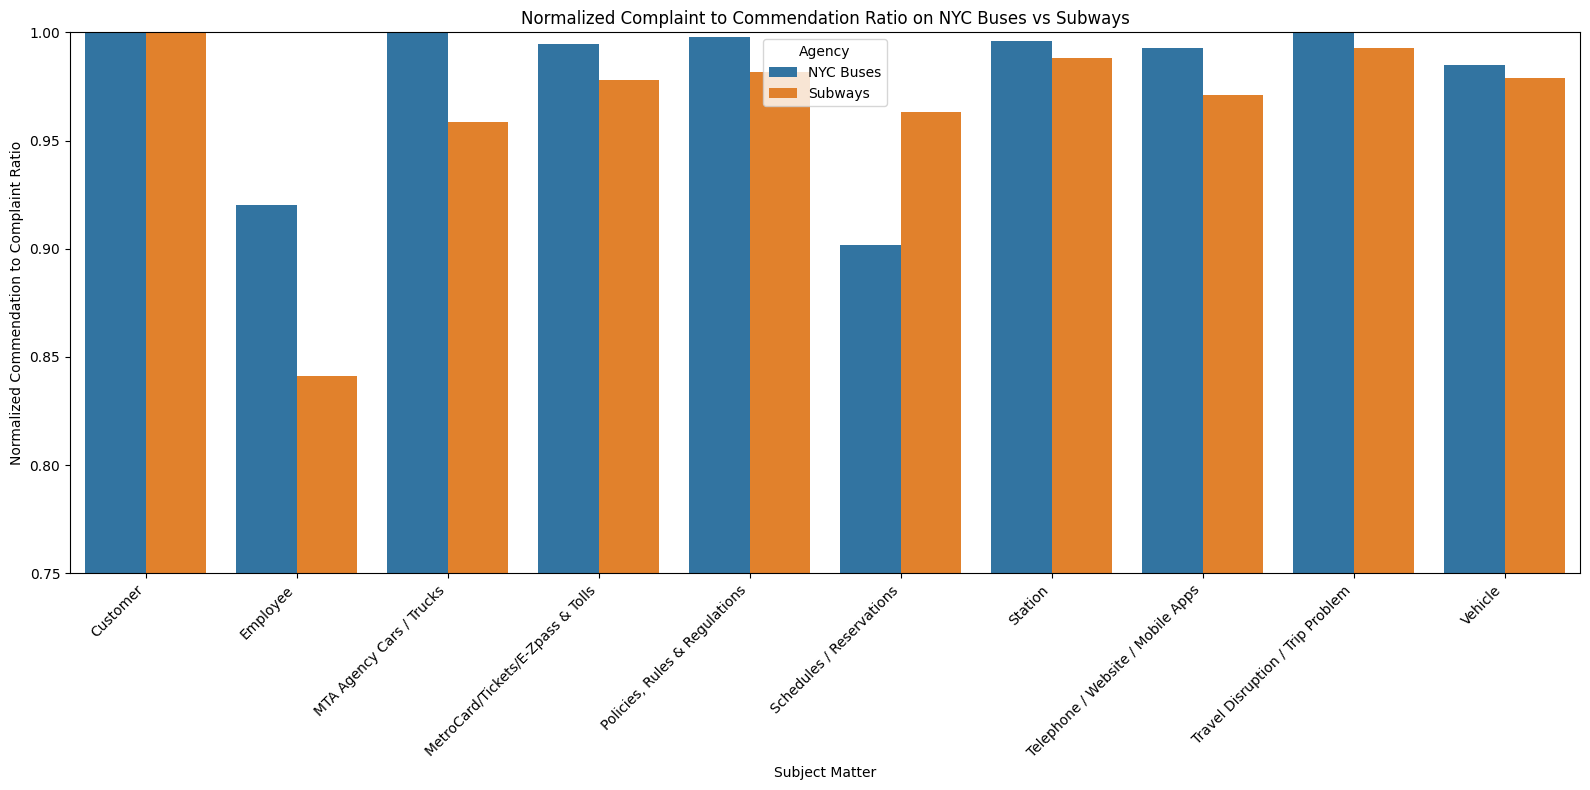

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('updated_dataset.csv')

# Filter for NYC Buses and Subways
filtered_data = data[data['Agency'].str.contains('NYC Buses|Subways', case=False, na=False)]

# Group by Agency, Subject Matter, and Commendation or Complaint
grouped_data = filtered_data.groupby(['Agency', 'Subject Matter', 'Commendation or Complaint']).size().reset_index(name='Count')

# Group subject matters that cover the same area
grouped_data['Subject Matter'] = grouped_data['Subject Matter'].replace(
    ['Train', 'Trains', 'Buses'], 'Vehicle'
).replace(
    ['Employee', 'Employees'], 'Employee'
).replace(
    ['Station', 'Station /Bus Stop /Facility /Structure'], 'Station'
)

# Drop unusable subject matters
grouped_data = grouped_data[~grouped_data['Subject Matter'].isin(['Commendation',
                                                                  'Complaint',
                                                                  'Public Hearing',
                                                                  'Service'
                                                                  ])]

# Pivot table to separate complaints and commendations
pivot_data = grouped_data.pivot_table(
    index=['Agency', 'Subject Matter'],
    columns='Commendation or Complaint',
    values='Count',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Calculate the normalized ratio: complaints / (complaints + commendations)
pivot_data['Normalized Ratio'] = pivot_data['Complaint'] / (pivot_data['Complaint'] + pivot_data['Commendation'] + 1e-6)

# Plot results
plt.figure(figsize=(16, 8))
sns.barplot(
    data=pivot_data,
    x='Subject Matter',
    y='Normalized Ratio',
    hue='Agency'
)
plt.title('Normalized Complaint to Commendation Ratio on NYC Buses vs Subways')
plt.xlabel('Subject Matter')
plt.ylabel('Normalized Commendation to Complaint Ratio')
plt.ylim(0.75, 1.0)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Agency')
plt.tight_layout()

plt.show()
